In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("all_gp.csv")
len(df)

44992

In [2]:
df.columns

Index(['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR',
       'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 'REF_FRAME', 'TIME_SYSTEM',
       'MEAN_ELEMENT_THEORY', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS',
       'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'SITE',
       'DECAY_DATE', 'FILE', 'GP_ID', 'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'],
      dtype='object')

In [3]:
df = df[pd.isnull(df.DECAY_DATE)]

In [4]:
df = df[["NORAD_CAT_ID","PERIOD","APOAPSIS","PERIAPSIS","OBJECT_TYPE"]]
df

,NORAD_CAT_ID,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE
0,47233,92.902,422.156,411.205,PAYLOAD
1,47232,93.771,524.898,393.072,ROCKET BODY
2,47231,94.377,495.629,481.262,PAYLOAD
3,47230,115.848,1505.430,1482.365,TBA
4,47229,115.863,1504.801,1484.323,TBA
...,...,...,...,...,...
44980,20,124.591,3261.901,508.356,PAYLOAD
44984,16,137.315,4221.525,655.604,ROCKET BODY
44986,12,125.833,3326.747,553.195,ROCKET BODY
44987,11,121.446,2936.787,554.225,PAYLOAD


In [5]:
import matplotlib.pylab as plt
%matplotlib inline

In [12]:
df = df[df.APOAPSIS < 36000] # GEO or less only, some satellites fly REALLY far

In [7]:
payload = df[(df.OBJECT_TYPE == "PAYLOAD") | (df.OBJECT_TYPE == "TBA")]
debris = df[(df.OBJECT_TYPE == "DEBRIS") | (df.OBJECT_TYPE == "ROCKET BODY")]

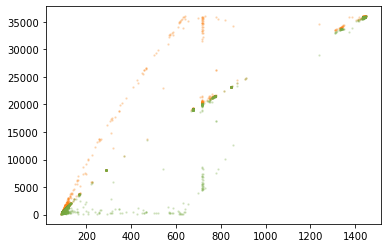

In [8]:
plt.scatter(payload.PERIOD, payload.APOAPSIS, color='#fc821535', s=2)
plt.scatter(payload.PERIOD, payload.PERIAPSIS, color='#76aa4335', s=2)
plt.show()

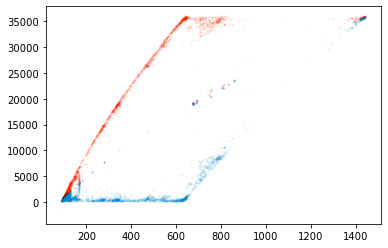

In [9]:
plt.scatter(debris.PERIOD, debris.APOAPSIS, color='#fe270010', s=1)
plt.scatter(debris.PERIOD, debris.PERIAPSIS, color='#038fd510', s=1)
plt.show()

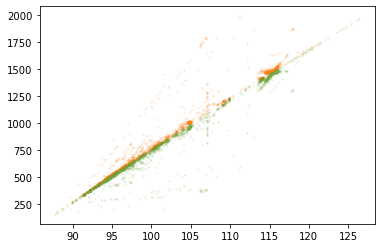

In [10]:
# LEO
payload = payload[payload.APOAPSIS < 2000]
plt.scatter(payload.PERIOD, payload.APOAPSIS, color='#fc821515', s=2)
plt.scatter(payload.PERIOD, payload.PERIAPSIS, color='#76aa4315', s=2)
plt.show()

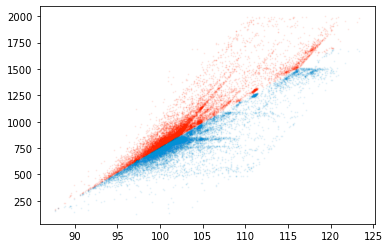

In [11]:
# LEO
debris = debris[debris.APOAPSIS < 2000]
plt.scatter(debris.PERIOD, debris.APOAPSIS, color='#fe270010', s=1)
plt.scatter(debris.PERIOD, debris.PERIAPSIS, color='#038fd510', s=1)
plt.show()